In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from collections import Counter
import numpy as np

In [34]:
import cPickle as pickle

In [2]:
f = '../data/sherlock_current.csv'

In [3]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [4]:
df = pd.read_csv(f)
df = df.sort('PublishDate')
df.drop(df.head(5).index, inplace=True)

In [5]:
df = df[['Additional_Tags','PublishDate', 'Hits', 'Kudos', 'Comments', 'Title']]
df = df[df.Additional_Tags.notnull()]

In [6]:
df.head()

,Additional_Tags,PublishDate,Hits,Kudos,Comments,Title
75531,"5 Things, Prompt Fic, Community: sherlockbbc_fic",2010-07-28,19282,401,31,Handle With Care
75532,"Therapy, Codependency, First Time, Angst, Humor",2010-07-28,7975,295,14,The Perils of Urban Warfare
75529,Hurt/Comfort,2010-07-31,6605,156,22,'You give me….'
75527,Episode Tag,2010-08-01,4995,128,16,Days Behind
75525,"Community: sherlockbbc_fic, Sleepwalking",2010-08-02,30505,1276,90,Safe


In [35]:
pickle.dump(df, open( "sherlock_current.p", "wb" ) )

In [ ]:
pickle.load( open( "sherlock_current.p", "rb" ) )

In [7]:
timelist = df.PublishDate.drop_duplicates().tolist()
timelist = [str(i)[:7] for i in timelist]
timelist = list(set(timelist))
timelist = sorted(timelist)

In [8]:
timelist_event = ['Season 1 start', 'Season 1 end', '', '', 'Season 1 DVD release', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', 'Season 2', '', '', '', 'Season 2 DVD release', '', '', '', '', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', '', 'Christmas special', '', 'Season 3', 'Season 3 DVD release', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', '', '', '', '', '', '', '']

In [9]:
def calculate_tag_time(tag):
    time_work = {}
    for i in timelist:
        df_time = create_df_time(df, i)
        time_work[i] = len(df_time[df_time.Additional_Tags.str.contains(tag)])
    k = sorted(time_work.keys())
    v = [time_work.get(i) for i in k]
    return k,v

In [10]:
def create_tag_plot(time_list_event):
    fig, ax = plt.subplots(figsize = (15,10))
    newax = ax.twiny()

    # Make some room at the bottom
    fig.subplots_adjust(bottom=0.30)

    newax.set_frame_on(True)
    newax.patch.set_visible(False)
    newax.xaxis.set_ticks_position('bottom')
    newax.xaxis.set_label_position('bottom')
    newax.spines['bottom'].set_position(('outward', 60))

    xlist = range(2,67)
    xlist2 = range(0,72)

    ax.xaxis.set_ticks(xlist)
    ax.set_xticklabels(timelist, rotation=70)

    newax.xaxis.set_ticks(xlist2)
    newax.set_xticklabels(timelist_event, rotation=70)

    ax.set_xlabel('Time and major event')
    ax.set_ylabel('Number of works with tag')
    plt.tight_layout()
    return ax, xlist
    # plt.savefig('./time_work.pdf', format = 'pdf')

In [23]:
def add_tag_line(ax,xlist,v):
    ax.plot(xlist,v)

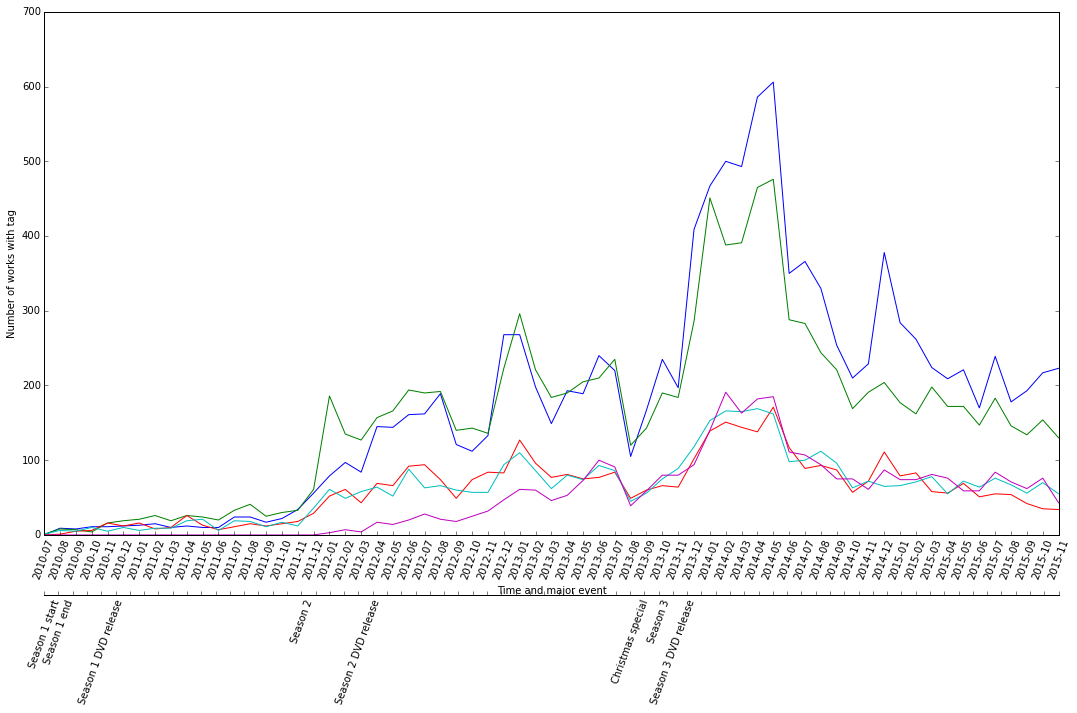

In [25]:
ax, xlist = create_tag_plot(timelist_event)
k,v = calculate_tag_time('Fluff')
add_tag_line(ax, xlist, v)
k,v2 = calculate_tag_time('Angst')
add_tag_line(ax, xlist, v2)
k,v3 = calculate_tag_time('Romance')
add_tag_line(ax, xlist, v3)
k,v4 = calculate_tag_time('Hurt/Comfort')
add_tag_line(ax, xlist, v4)
k,v5 = calculate_tag_time('Johnlock - Freeform')
add_tag_line(ax, xlist, v5)


In [ ]:
Fluff', 8987),
 (' Angst', 8357),
 (' Romance', 3609),
 (' Hurt/Comfort', 3289),
 (' Johnlock - Freeform', 3272),
 (' Humor', 2910),
 (' Post Reichenbach', 2666),
 (' Friendship', 2646),
 (' Established Relationship', 2588),
 (' Anal Sex', 2534),

In [26]:
tags = df.Additional_Tags.tolist()

In [27]:
tags_s = []
for i in tags:
    tags_s1 = []
    j = str(i).split(',')
    for k in j:
        tags_s1.append(k)
    tags_s.append(tags_s1)

In [28]:
tags_s = []
for i in tags:
    j = str(i).split(',')
    for k in j:
        tags_s.append(k)
tags_s = [i for i in tags_s if i != [] and i != 'nan']

In [29]:
len(tags_s)

395015

In [30]:
tag_freq = {i:tags_s.count(i) for i in set(tags_s)}

In [31]:
import operator
sorted_tag_freq = sorted(tag_freq.items(), key=operator.itemgetter(1), reverse = True)

In [33]:
len(sorted_tag_freq)

77865

In [32]:
sorted_tag_freq[0:100]

[(' Fluff', 8987),
 (' Angst', 8357),
 (' Romance', 3609),
 (' Hurt/Comfort', 3289),
 (' Johnlock - Freeform', 3272),
 (' Humor', 2910),
 (' Post Reichenbach', 2666),
 (' Friendship', 2646),
 (' Established Relationship', 2588),
 (' Anal Sex', 2534),
 (' First Kiss', 2439),
 (' Alternate Universe', 2363),
 (' First Time', 2243),
 (' Post-Reichenbach', 2143),
 (' Crossover', 1698),
 (' Smut', 1696),
 (' Oral Sex', 1665),
 (' AU', 1643),
 (' Teenlock', 1369),
 (' Slash', 1345),
 (' Crack', 1336),
 (' 221B Ficlet', 1273),
 (' Love', 1240),
 (' Fluff and Angst', 1222),
 (' Blow Jobs', 1150),
 (' Friends to Lovers', 1131),
 (' Drug Use', 1129),
 (' Sherlolly - Freeform', 1102),
 (' Pre-Slash', 1098),
 (' Emotional Hurt/Comfort', 1089),
 (' Case Fic', 1045),
 (' Drabble', 1011),
 (' Masturbation', 1003),
 (' Plot What Plot/Porn Without Plot', 979),
 (' Kissing', 956),
 (' Christmas', 956),
 (' Parentlock', 929),
 (' Johnlock Fluff', 907),
 (' Explicit Sexual Content', 893),
 (' Alpha/Beta/Om

In [ ]:
#combine 同义词(eg. post rein)
#detect tags that appear early/late (those like post rein can be sanity check  )